# IMPORT SECTION

In [108]:
!pip install pandas numpy matplotlib seaborn scikit-learn plotly joblib imbalanced-learn




Defaulting to user installation because normal site-packages is not writeable


In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import joblib
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV


# LOADING DATASET


In [110]:
Diabetes= pd.read_csv('diabetes_data_upload.csv') # loading the dataset

In [111]:
Diabetes.head(10) # Displays top 10 records of the dataset

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


In [112]:
Diabetes.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


## CHECKING FOR MISSING VALUES

In [113]:
# CHECKING FOR MISSING VALUES
Diabetes.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [114]:
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [115]:
Diabetes.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


# EXPLORATORY DATA ANALYSIS

## DISTRIBUTIONS OF DIFFERENT FEATURES

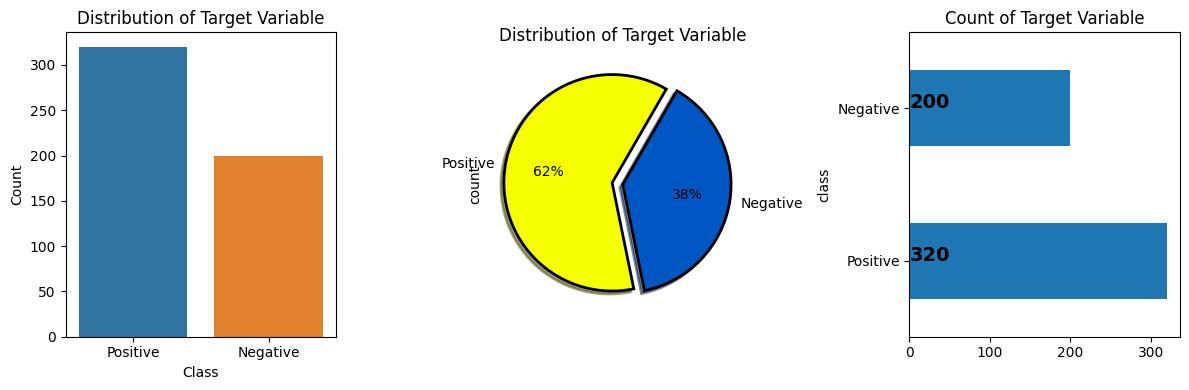

In [116]:


# Define custom colors for the countplot
colors = ["#1f77b4", "#ff7f0e"]  # Example colors - you can replace with your desired colors

# Set up the figure and axes
plt.figure(figsize=(12, 4))

# Plotting countplot with x assigned to hue
plt.subplot(131)
sns.countplot(x='class', hue='class', data=Diabetes, palette=colors, legend=False)
plt.title('Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')

# Plotting pie chart
plt.subplot(132)
Diabetes["class"].value_counts().plot.pie(autopct="%1.0f%%", colors=sns.color_palette("prism", 7),
                                           startangle=60, labels=["Positive", "Negative"],
                                           wedgeprops={"linewidth": 2, "edgecolor": "k"}, explode=[.1, 0],
                                           shadow=True)
plt.title("Distribution of Target Variable")

# Plotting horizontal bar plot
plt.subplot(133)
ax = Diabetes["class"].value_counts().plot(kind="barh")
for i, j in enumerate(Diabetes["class"].value_counts().values):
    ax.text(.7, i, j, weight="bold", fontsize=14)
plt.title("Count of Target Variable")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [117]:
agehist= px.histogram(Diabetes, x='Age', color="class", title="Distribution of Postive cases with Ages")
agehist.show()

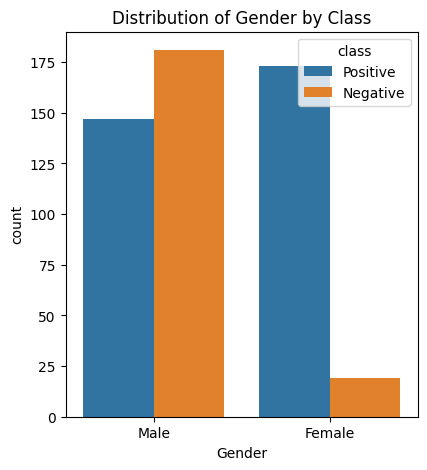

class,Negative,Positive
Gender,,
Female,9.500000,54.060000
Male,90.500000,45.940000


In [118]:
# Plotting countplot
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x='Gender', hue='class', data=Diabetes)
plt.title('Distribution of Gender by Class')
plt.show()
pltbl= ['Gender', 'class']
cm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(Diabetes[pltbl[0]],Diabetes[pltbl[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

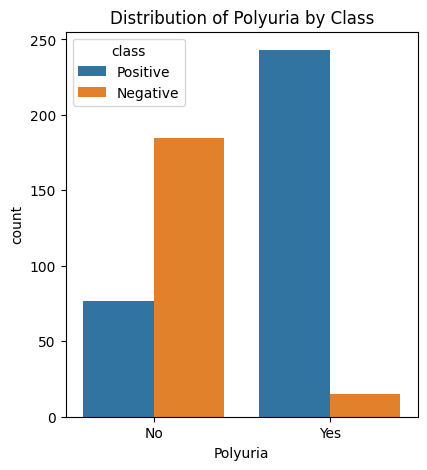

class,Negative,Positive
Polyuria,,
No,92.500000,24.060000
Yes,7.500000,75.940000


In [119]:
# Plotting countplot
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x='Polyuria', hue='class', data=Diabetes)
plt.title('Distribution of Polyuria by Class')
plt.show()

plttbl_polyuria= ['Polyuria', 'class']
pm = sns.light_palette("orange", as_cmap=True)
(round(pd.crosstab(Diabetes[plttbl_polyuria[0]], Diabetes[plttbl_polyuria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = pm)

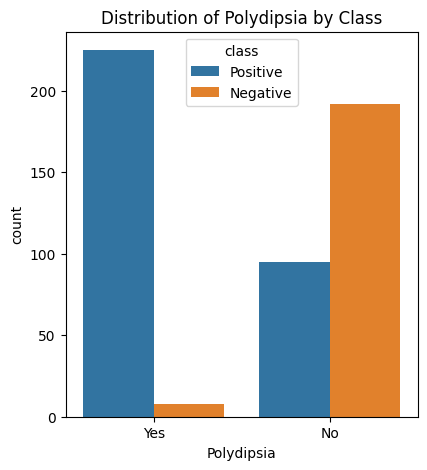

class,Negative,Positive
Polydipsia,,
No,96.000000,29.690000
Yes,4.000000,70.310000


In [120]:
# Plotting countplot
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x='Polydipsia', hue='class', data=Diabetes)
plt.title('Distribution of Polydipsia by Class')
plt.show()

plttblpolydispia= ['Polydipsia', 'class']
rm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(Diabetes[plttblpolydispia[0]], Diabetes[plttblpolydispia[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = rm)

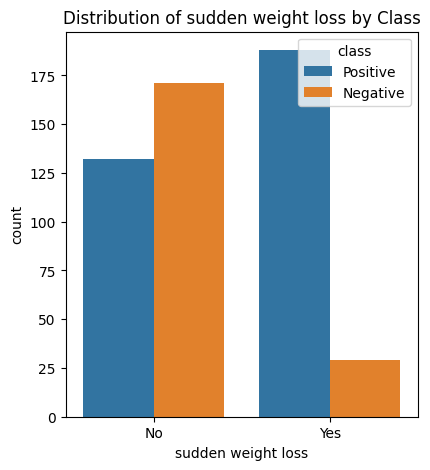

class,Negative,Positive
sudden weight loss,,
No,85.500000,41.250000
Yes,14.500000,58.750000


In [121]:
# Distribution of sudden weight loss
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x='sudden weight loss', hue='class', data=Diabetes)
plt.title('Distribution of sudden weight loss by Class')
plt.show()


plot_criteria= ['sudden weight loss', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(Diabetes[plot_criteria[0]], Diabetes[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

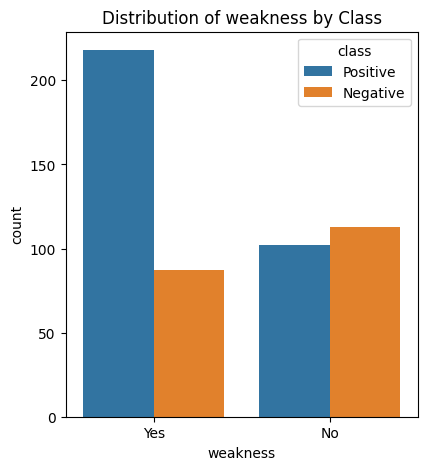

class,Negative,Positive
weakness,,
No,56.500000,31.870000
Yes,43.500000,68.120000


In [122]:
# Distribution of weakness
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x='weakness', hue='class', data=Diabetes)
plt.title('Distribution of weakness by Class')
plt.show()

plot_criteria= ['weakness', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(Diabetes[plot_criteria[0]], Diabetes[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

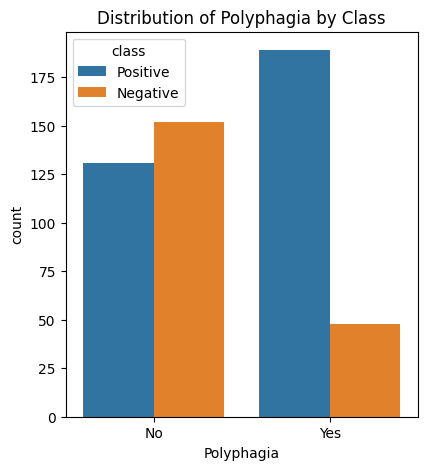

class,Negative,Positive
Polyphagia,,
No,76.000000,40.940000
Yes,24.000000,59.060000


In [123]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x='Polyphagia', hue='class', data=Diabetes)
plt.title('Distribution of Polyphagia by Class')
plt.show()

plot_criteria= ['Polyphagia', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(Diabetes[plot_criteria[0]], Diabetes[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

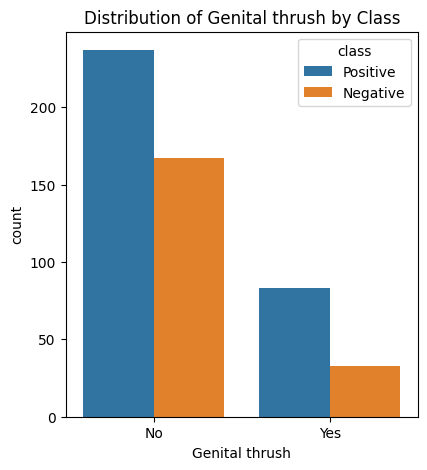

class,Negative,Positive
Genital thrush,,
No,83.500000,74.060000
Yes,16.500000,25.940000


In [124]:
# Distribution of Genital thrush
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x='Genital thrush', hue='class', data=Diabetes)
plt.title('Distribution of Genital thrush by Class')
plt.show()


plot_criteria= ['Genital thrush', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(Diabetes[plot_criteria[0]], Diabetes[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

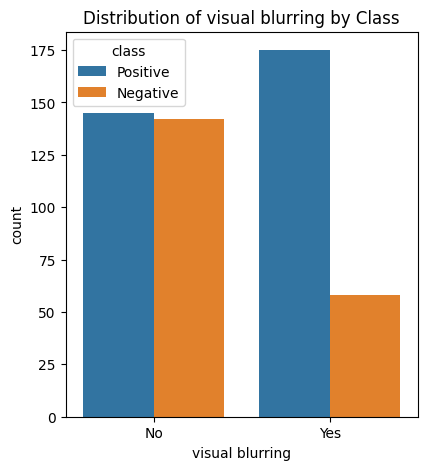

class,Negative,Positive
visual blurring,,
No,71.000000,45.310000
Yes,29.000000,54.690000


In [125]:
# Distribution of visual blurring
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x='visual blurring', hue='class', data=Diabetes)
plt.title('Distribution of visual blurring by Class')
plt.show()


plot_criteria= ['visual blurring', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(Diabetes[plot_criteria[0]], Diabetes[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

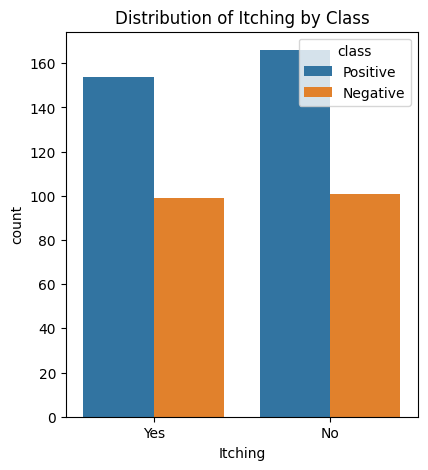

class,Negative,Positive
Itching,,
No,50.500000,51.880000
Yes,49.500000,48.120000


In [126]:
# Distribution of Itching
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x='Itching', hue='class', data=Diabetes)
plt.title('Distribution of Itching by Class')
plt.show()


plot_criteria= ['Itching', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(Diabetes[plot_criteria[0]], Diabetes[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

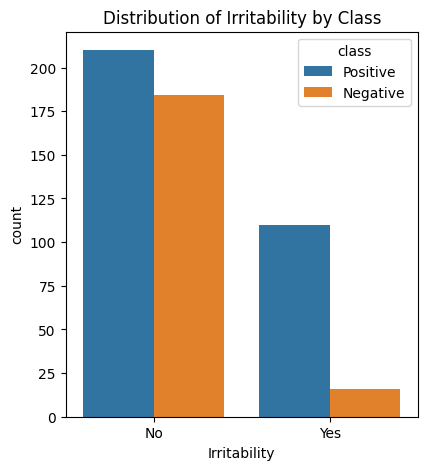

class,Negative,Positive
Irritability,,
No,92.000000,65.620000
Yes,8.000000,34.380000


In [127]:
# Distribution of Irritability
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x='Irritability', hue='class', data=Diabetes)
plt.title('Distribution of Irritability by Class')
plt.show()


plot_criteria= ['Irritability', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(Diabetes[plot_criteria[0]], Diabetes[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

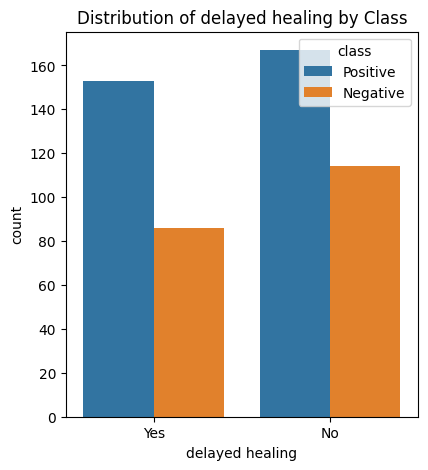

class,Negative,Positive
delayed healing,,
No,57.000000,52.190000
Yes,43.000000,47.810000


In [128]:
# Distribution of delayed healing
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x='delayed healing', hue='class', data=Diabetes)
plt.title('Distribution of delayed healing by Class')
plt.show()


plot_criteria= ['delayed healing', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(Diabetes[plot_criteria[0]], Diabetes[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

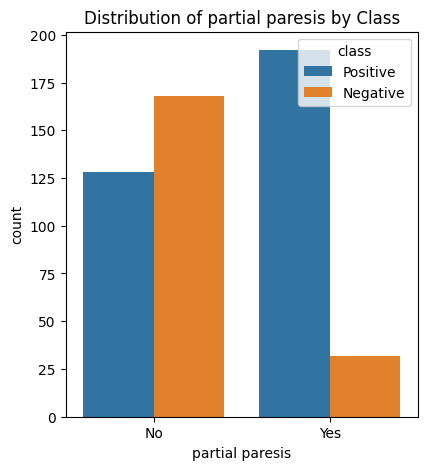

class,Negative,Positive
partial paresis,,
No,84.000000,40.000000
Yes,16.000000,60.000000


In [129]:
# Distribution of partial paresis
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x='partial paresis', hue='class', data=Diabetes)
plt.title('Distribution of partial paresis by Class')
plt.show()


plot_criteria= ['partial paresis', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(Diabetes[plot_criteria[0]], Diabetes[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

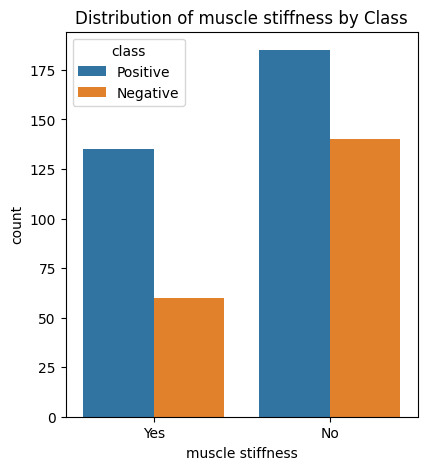

class,Negative,Positive
muscle stiffness,,
No,70.000000,57.810000
Yes,30.000000,42.190000


In [130]:
# Distribution of muscle stiffness
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x='muscle stiffness', hue='class', data=Diabetes)
plt.title('Distribution of muscle stiffness by Class')
plt.show()


plot_criteria= ['muscle stiffness', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(Diabetes[plot_criteria[0]], Diabetes[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

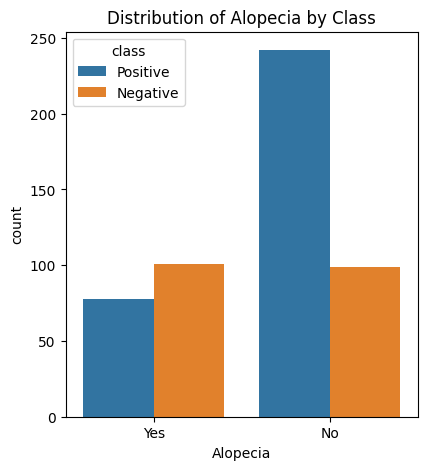

class,Negative,Positive
Alopecia,,
No,49.500000,75.620000
Yes,50.500000,24.380000


In [131]:
# Distribution of Alopecia
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x='Alopecia', hue='class', data=Diabetes)
plt.title('Distribution of Alopecia by Class')
plt.show()


plot_criteria= ['Alopecia', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(Diabetes[plot_criteria[0]], Diabetes[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

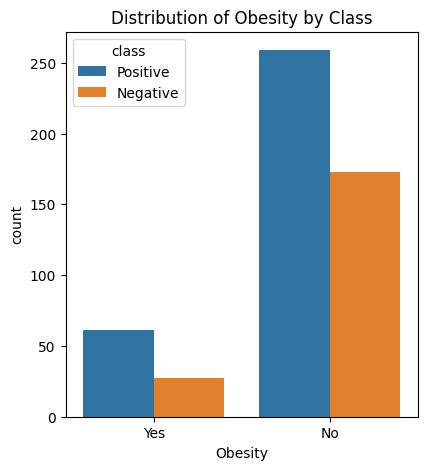

class,Negative,Positive
Obesity,,
No,86.500000,80.940000
Yes,13.500000,19.060000


In [132]:
# Distribution of Obesity
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x='Obesity', hue='class', data=Diabetes)
plt.title('Distribution of Obesity by Class')
plt.show()


plot_criteria= ['Obesity', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(Diabetes[plot_criteria[0]], Diabetes[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

## OCCURENCES OF SYMPTOMS IN PATIENTS

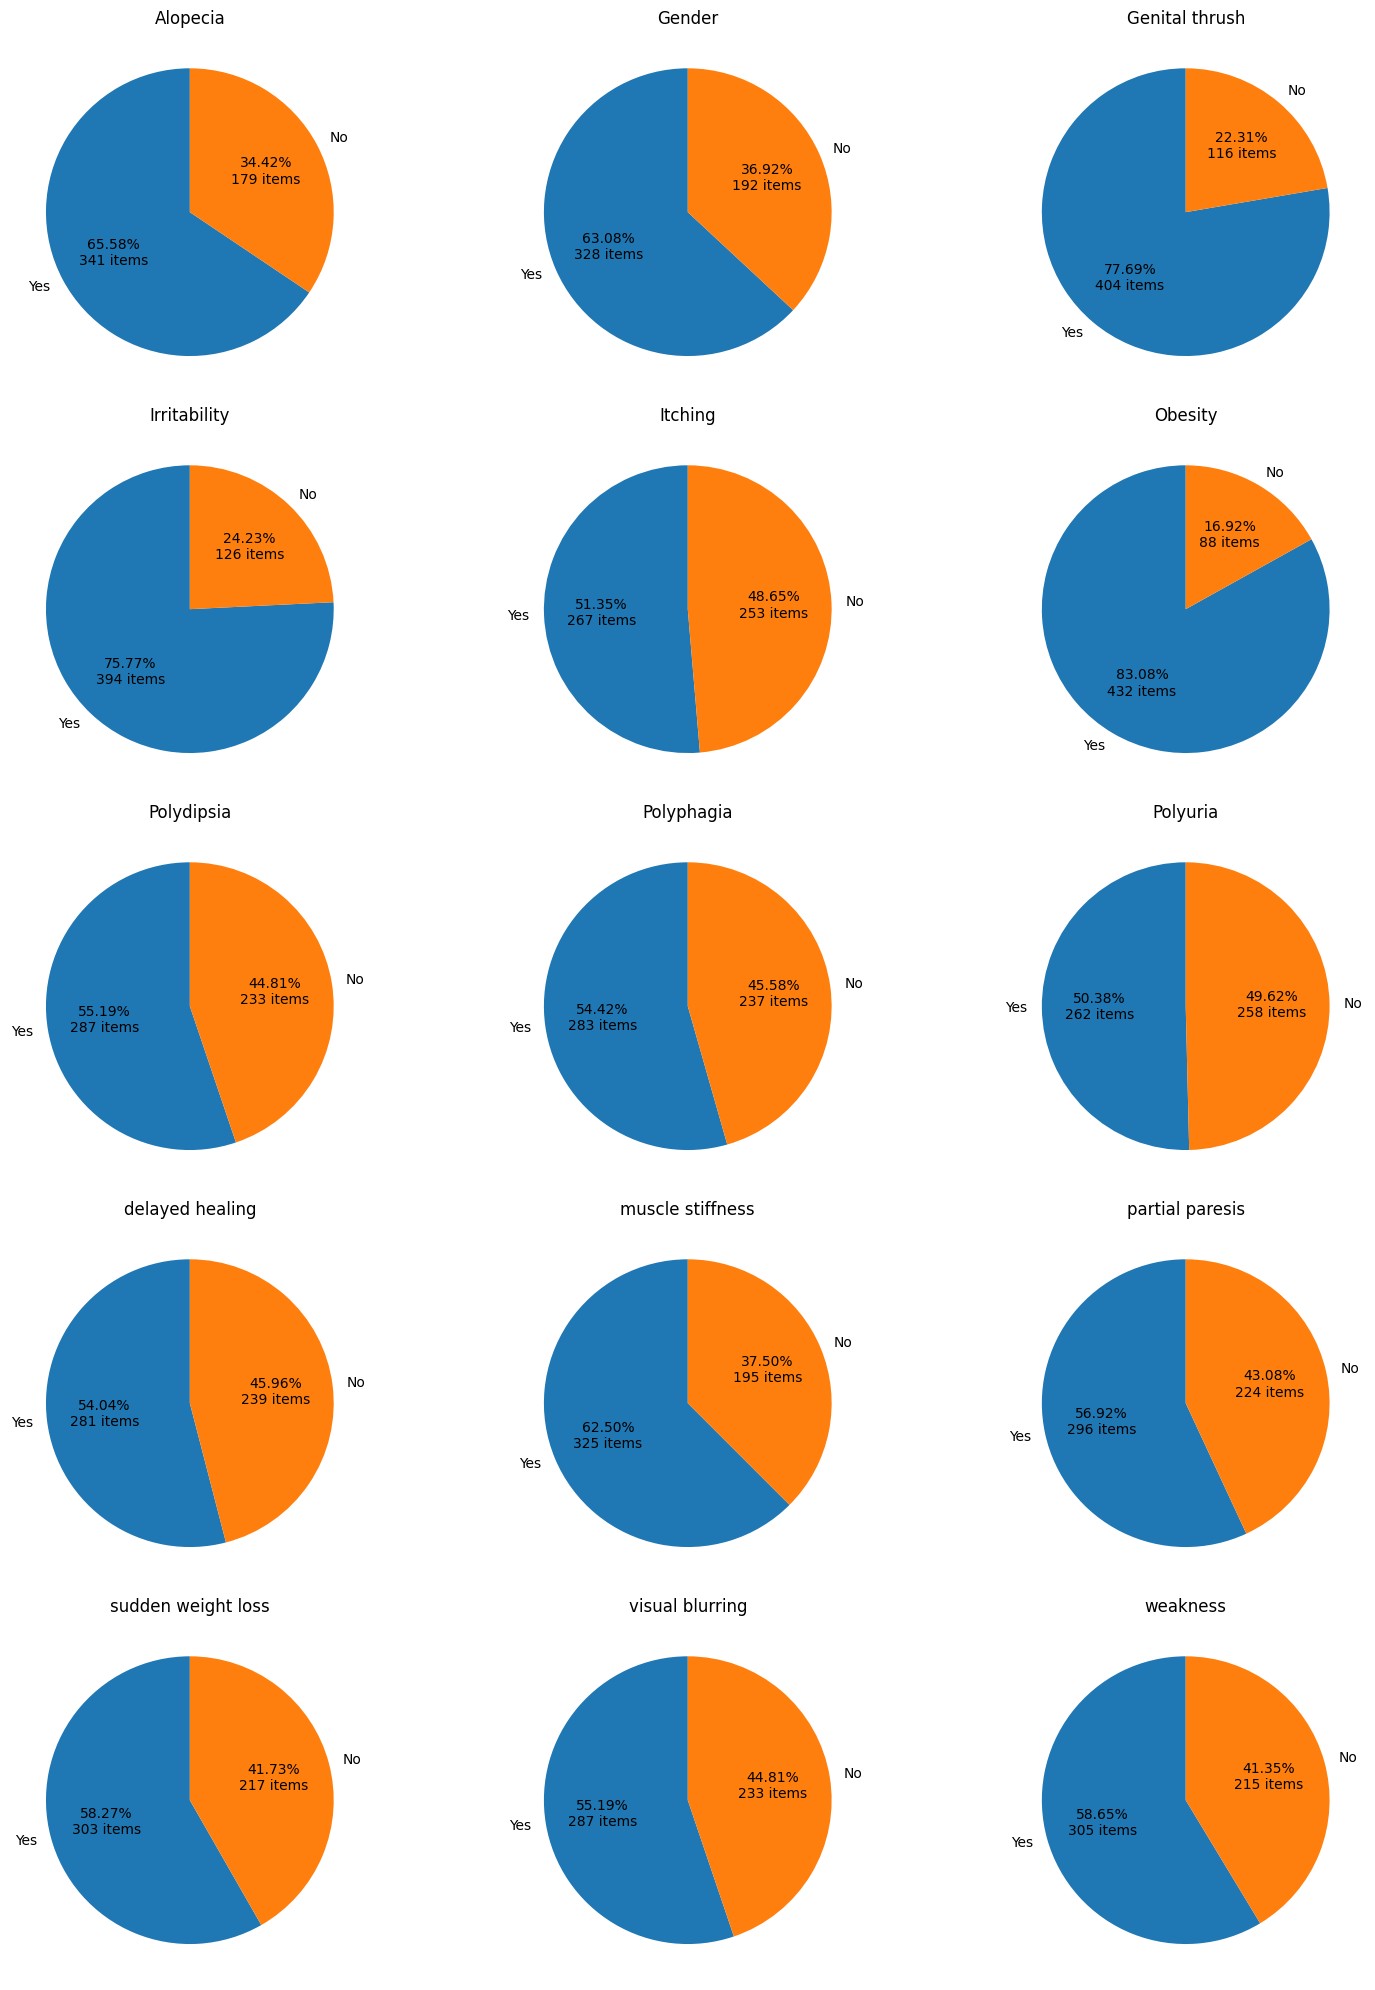

In [133]:
# Function for Pie Plot
def plotPie(values, titles, label):
    num_plots = len(values)
    num_rows = (num_plots + 2) // 3  # Calculate the number of rows needed
    fig, axes = plt.subplots(num_rows, 3, figsize=(16, 4*num_rows))
    for i, ax in enumerate(axes.flat):
        if i < num_plots:
            ax.pie(
                values[i].value_counts(),
                startangle=90,
                labels=label,
                autopct=(lambda p: f'{p:.2f}%\n{p*sum(values[i].value_counts())/100 :.0f} items')
            )
            ax.set_title(titles[i])
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming 'df_symptoms' contains the data you want to plot
# Assuming 'symptom_titles' contains titles for each subplot

# Select columns for pie charts
df_symptoms = Diabetes[Diabetes.columns.difference(["Age", "class"])]

# Specify titles for each pie chart
symptom_titles = df_symptoms.columns

# Plot pie charts with three per row
plotPie([df_symptoms[column] for column in df_symptoms.columns], symptom_titles, ["Yes", "No"])


# DATA PREPROCESSING

## IMPORTS

## ENCODING CATEGORICAL COLUMNS

In [134]:
# Make a copy of the dataset
dtacpy1 = Diabetes.copy()

# Initialize LabelEncoder
number = preprocessing.LabelEncoder()

# Apply LabelEncoder to each column in the dataset excluding 'Age' column
for column in dtacpy1.columns:
    if column != 'Age':
        dtacpy1[column] = number.fit_transform(dtacpy1[column])

In [135]:
dtacpy1.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


## CORRELATION WITH TARGET VARIABLE

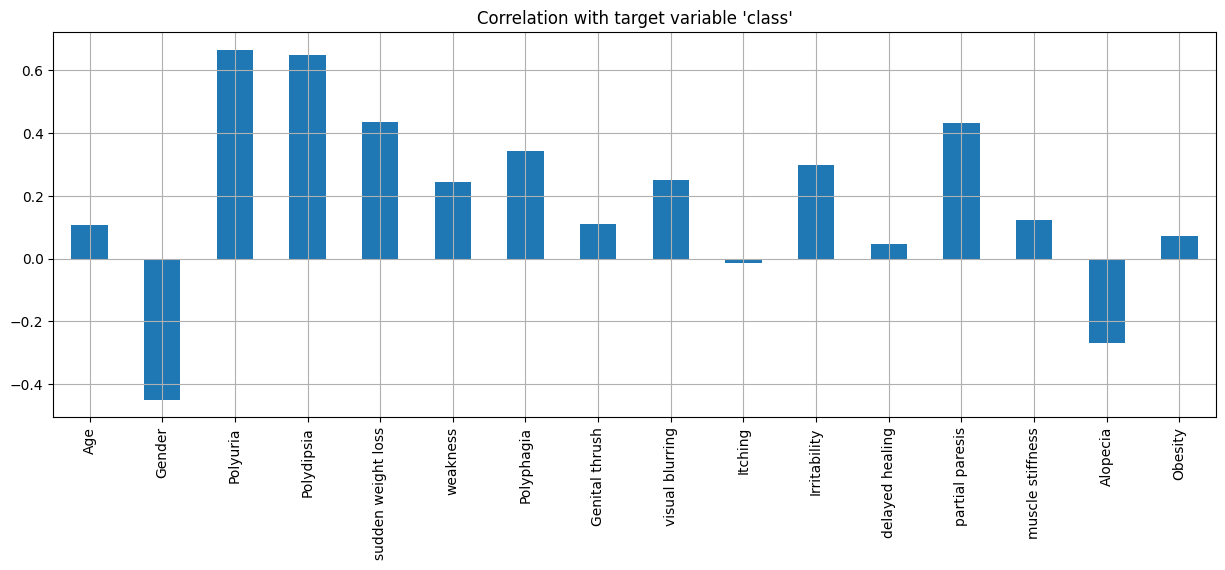

In [136]:
# Separate features (X) and target variable (y)
X = dtacpy1.drop('class', axis=1)
y = dtacpy1['class']

# Compute correlation between features and target variable
correlation = X.apply(lambda x: x.corr(y))

# Plot the correlation
correlation.plot.bar(title="Correlation with target variable 'class'", grid=True, figsize=(15, 5))
plt.show()

In [137]:
print (X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int32
 2   Polyuria            520 non-null    int32
 3   Polydipsia          520 non-null    int32
 4   sudden weight loss  520 non-null    int32
 5   weakness            520 non-null    int32
 6   Polyphagia          520 non-null    int32
 7   Genital thrush      520 non-null    int32
 8   visual blurring     520 non-null    int32
 9   Itching             520 non-null    int32
 10  Irritability        520 non-null    int32
 11  delayed healing     520 non-null    int32
 12  partial paresis     520 non-null    int32
 13  muscle stiffness    520 non-null    int32
 14  Alopecia            520 non-null    int32
 15  Obesity             520 non-null    int32
dtypes: int32(15), int64(1)
memory usage: 34.7 KB

In [138]:
X.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [139]:
print (y.info())

<class 'pandas.core.series.Series'>
RangeIndex: 520 entries, 0 to 519
Series name: class
Non-Null Count  Dtype
--------------  -----
520 non-null    int32
dtypes: int32(1)
memory usage: 2.2 KB
None


In [140]:
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int32

## STANDARDIZATION

In [141]:

# Assuming 'dtacpy1' is your DataFrame
X = dtacpy1.drop('class', axis=1)
y = dtacpy1['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize numerical features using StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.548772,0.754298,-0.972895,-0.870893,-0.799775,0.851539,-0.925820,-0.509427,-0.946485,-1.016622,-0.547723,-0.930949,-0.841974,-0.804400,-0.754298,-0.417365
1,-0.979325,-1.325736,1.027860,1.148247,-0.799775,0.851539,1.080123,-0.509427,1.056541,0.983650,-0.547723,1.074172,1.187685,-0.804400,-0.754298,-0.417365
2,0.729018,0.754298,-0.972895,-0.870893,-0.799775,-1.174344,1.080123,-0.509427,1.056541,-1.016622,-0.547723,-0.930949,-0.841974,1.243163,-0.754298,-0.417365
3,1.949263,0.754298,1.027860,-0.870893,-0.799775,-1.174344,1.080123,-0.509427,1.056541,0.983650,-0.547723,1.074172,1.187685,1.243163,1.325736,-0.417365
4,-0.003129,0.754298,-0.972895,1.148247,1.250352,0.851539,-0.925820,-0.509427,1.056541,0.983650,1.825742,1.074172,-0.841974,-0.804400,-0.754298,-0.417365


## OVERSAMPLING or BALANCING DATASET

In [142]:

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'Distribution of Target Variable')

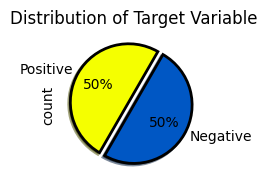

In [143]:
# Plotting pie chart
plt.subplot(132)
y_train_resampled.value_counts().plot.pie(autopct="%1.0f%%", colors=sns.color_palette("prism", 7),
                                           startangle=60, labels=["Positive", "Negative"],
                                           wedgeprops={"linewidth": 2, "edgecolor": "k"}, explode=[.1, 0],
                                           shadow=True)
plt.title("Distribution of Target Variable")

# MODEL BUILDING

## LOGISTICE REGRESSION

In [144]:

# Define hyperparameters for tuning
# Define hyperparameters for tuning
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear']}
# Define the logistic regression model
log_reg = LogisticRegression()
# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(log_reg, parameters, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)
# Build logistic regression model with best parameters
best_log_reg = LogisticRegression(**grid_search.best_params_)
best_log_reg.fit(X_train_resampled, y_train_resampled)

# Make predictions on the scaled test data
y_pred = best_log_reg.predict(X_test)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")
# Print F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Print precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Print recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Perform cross-validation on the training set
accuracies = cross_val_score(estimator=best_log_reg, X=X_train_resampled, y=y_train_resampled, cv=10)

# Display the cross-validation results
print("Accuracy: {:.2f} %".format(accuracies.mean() * 100))
print("Standard Deviation: {:.2f} %".format(accuracies.std() * 100))

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Confusion Matrix:
[[50  4]
 [ 6 96]]
Accuracy: 0.94
F1 Score: 0.9504950495049505
Precision: 0.96
Recall: 0.9411764705882353
Accuracy: 91.53 %
Standard Deviation: 2.67 %


## DECISION TREE CLASSIFIER

In [145]:


# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Build the Decision Tree classifier with the best hyperparameters
best_decision_tree = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                            min_samples_split=best_params['min_samples_split'],
                                            min_samples_leaf=best_params['min_samples_leaf'],
                                            random_state=42)

# Train the Decision Tree classifier on the entire resampled training data
best_decision_tree.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_dt = best_decision_tree.predict(X_test)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(conf_matrix)

# Print accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy)

# Print F1 score
f1 = f1_score(y_test, y_pred_dt)
print("F1 Score:", f1)

# Print precision
precision = precision_score(y_test, y_pred_dt)
print("Precision:", precision)

# Print recall
recall = recall_score(y_test, y_pred_dt)
print("Recall:", recall)
# Perform cross-validation on the training set
accuracies_dt = cross_val_score(estimator=best_decision_tree, X=X_train_resampled, y=y_train_resampled, cv=10)

# Display the cross-validation results
print("Cross-Validation Results:")
print("Accuracy: {:.2f} %".format(accuracies_dt.mean() * 100))
print("Standard Deviation: {:.2f} %".format(accuracies_dt.std() * 100))

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Confusion Matrix:
[[52  2]
 [ 5 97]]
Accuracy: 0.9358974358974359
F1 Score: 0.9651741293532339
Precision: 0.9797979797979798
Recall: 0.9509803921568627
Cross-Validation Results:
Accuracy: 97.26 %
Standard Deviation: 2.66 %


## SUPPORT VECTOR MACHINE - NON LINEAR

In [146]:


# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}

# Initialize SVM classifier
svm = SVC(random_state=42)

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Build the SVM model with the best hyperparameters
best_svm = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'], random_state=42)

# Train the SVM model on the entire resampled training data
best_svm.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_svm = best_svm.predict(X_test)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(conf_matrix)

# Print accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)

# Print F1 score
f1 = f1_score(y_test, y_pred_svm)
print("F1 Score:", f1)

# Print precision
precision = precision_score(y_test, y_pred_svm)
print("Precision:", precision)

# Print recall
recall = recall_score(y_test, y_pred_svm)
print("Recall:", recall)
# Perform cross-validation on the training set
accuracies_svm = cross_val_score(estimator=best_svm, X=X_train_resampled, y=y_train_resampled, cv=10)

# Display the cross-validation results
print("Cross-Validation Results:")
print("Accuracy: {:.2f} %".format(accuracies_svm.mean() * 100))
print("Standard Deviation: {:.2f} %".format(accuracies_svm.std() * 100))

Best Hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Confusion Matrix:
[[ 53   1]
 [  1 101]]
Accuracy: 0.9871794871794872
F1 Score: 0.9901960784313726
Precision: 0.9901960784313726
Recall: 0.9901960784313726
Cross-Validation Results:
Accuracy: 97.04 %
Standard Deviation: 2.70 %


## GRADIENT BOOST

In [147]:


# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50,100,200],
    'learning_rate': [0.01,0.1,1],
    'max_depth': [2,3,5]
}

# Initialize Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(gb_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Build the Gradient Boosting classifier with the best hyperparameters
best_gb_classifier = GradientBoostingClassifier(n_estimators=best_params['n_estimators'],
                                                learning_rate=best_params['learning_rate'],
                                                max_depth=best_params['max_depth'],
                                                random_state=42)

# Train the Gradient Boosting classifier on the entire resampled training data
best_gb_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_gb = best_gb_classifier.predict(X_test)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gb)
print("Confusion Matrix:")
print(conf_matrix)

# Print accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy:", accuracy_gb)

# Print F1 score
f1 = f1_score(y_test, y_pred_gb)
print("F1 Score:", f1)

# Print precision
precision = precision_score(y_test, y_pred_gb)
print("Precision:", precision)

# Print recall
recall = recall_score(y_test, y_pred_gb)
print("Recall:", recall)
# Perform cross-validation on the training set
accuracies_gb = cross_val_score(estimator=gb_classifier, X=X_train_resampled, y=y_train_resampled, cv=10)

# Display the cross-validation results
print("Cross-Validation Results:")
print("Accuracy: {:.2f} %".format(accuracies_gb.mean() * 100))
print("Standard Deviation: {:.2f} %".format(accuracies_gb.std() * 100))

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Confusion Matrix:
[[ 53   1]
 [  2 100]]
Accuracy: 0.9807692307692307
F1 Score: 0.9852216748768473
Precision: 0.9900990099009901
Recall: 0.9803921568627451
Cross-Validation Results:
Accuracy: 97.03 %
Standard Deviation: 2.05 %


## RANDOM FOREST

In [148]:


# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Build the Random Forest classifier with the best hyperparameters
rf_classifier = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                            max_depth=best_params['max_depth'],
                                            min_samples_split=best_params['min_samples_split'],
                                            min_samples_leaf=best_params['min_samples_leaf'],
                                            random_state=42)

# Train the model on the scaled training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the scaled test data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model on the test set
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)



print(f"Accuracy: {accuracy_rf:.2f}")
print("Confusion Matrix:")
print(conf_matrix_rf)
# Print F1 score
f1 = f1_score(y_test, y_pred_rf)
print("F1 Score:", f1)

# Print precision
precision = precision_score(y_test, y_pred_rf)
print("Precision:", precision)

# Print recall
recall = recall_score(y_test, y_pred_rf)
print("Recall:", recall)

# Perform cross-validation on the training set
accuracies_rf = cross_val_score(estimator=rf_classifier, X=X_train_resampled, y=y_train_resampled, cv=10)

# Display the cross-validation results
print("Cross-Validation Results:")
print("Accuracy: {:.2f} %".format(accuracies_rf.mean() * 100))
print("Standard Deviation: {:.2f} %".format(accuracies_rf.std() * 100))


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.99
Confusion Matrix:
[[ 54   0]
 [  1 101]]
F1 Score: 0.9950738916256158
Precision: 1.0
Recall: 0.9901960784313726
Cross-Validation Results:
Accuracy: 97.26 %
Standard Deviation: 1.99 %


# EVALUATING MODELS

In [149]:

# Compute precision, recall, and F1-score for each model
precision_scores = [precision_score(y_test, y_pred_dt),
                    precision_score(y_test, y_pred),
                    precision_score(y_test, y_pred_gb),
                    precision_score(y_test, y_pred_rf),
                    precision_score(y_test, y_pred_svm),
                    ]

recall_scores = [recall_score(y_test, y_pred_dt),
                 recall_score(y_test, y_pred),
                 recall_score(y_test, y_pred_gb),
                 recall_score(y_test, y_pred_rf),
                 recall_score(y_test, y_pred_svm),
                 ]

f1_scores = [f1_score(y_test, y_pred_dt),
             f1_score(y_test, y_pred),
             f1_score(y_test, y_pred_gb),
             f1_score(y_test, y_pred_rf),
             f1_score(y_test, y_pred_svm),
             ]

confusion_matrices = [confusion_matrix(y_test, y_pred_dt),
                      confusion_matrix(y_test, y_pred),
                      confusion_matrix(y_test, y_pred_gb),
                      confusion_matrix(y_test, y_pred_rf),
                      confusion_matrix(y_test, y_pred_svm),
                      ]

# Create DataFrame
table = pd.DataFrame({
    "Accuracy": [accuracy_dt, accuracy, accuracy_gb, accuracy_rf, accuracy_svm],
    "CV Accuracy": [accuracies_dt.mean(), accuracies.mean(), accuracies_gb.mean(), accuracies_rf.mean(), accuracies_svm.mean()],
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1-score": f1_scores,
    "Confusion Matrix": confusion_matrices
}, index=["Decision Tree Classifier", "Logistic Regression", "Gradient Boost", "Random Forest", "Support Vector Machine"])

print(table)


                          Accuracy  CV Accuracy  Precision    Recall  \
Decision Tree Classifier  0.955128     0.972569   0.979798  0.950980   
Logistic Regression       0.935897     0.915328   0.960000  0.941176   
Gradient Boost            0.980769     0.970296   0.990099  0.980392   
Random Forest             0.993590     0.972569   1.000000  0.990196   
Support Vector Machine    0.987179     0.970402   0.990196  0.990196   

                          F1-score     Confusion Matrix  
Decision Tree Classifier  0.965174   [[52, 2], [5, 97]]  
Logistic Regression       0.950495   [[50, 4], [6, 96]]  
Gradient Boost            0.985222  [[53, 1], [2, 100]]  
Random Forest             0.995074  [[54, 0], [1, 101]]  
Support Vector Machine    0.990196  [[53, 1], [1, 101]]  


# LOADING BEST MODEL INTO PKL FILE

In [150]:

# saveing the model on disk
joblib.dump(rf_classifier,"diabetic_predictor.pkl")
joblib.dump(scaler,"Standard_Scalar.pkl")

['Standard_Scalar.pkl']

In [151]:
!pip install pipreqs

Defaulting to user installation because normal site-packages is not writeable


In [152]:

!pipreqs E:\DIABETESPREDICTOR\Backend



INFO: Not scanning for jupyter notebooks.
INFO: Successfully saved requirements file in E:\DIABETESPREDICTOR\Backend\requirements.txt


In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly
import joblib
import imblearn

print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("matplotlib version:", plt.__version__)
print("seaborn version:", sns.__version__)
print("scikit-learn version:", sklearn.__version__)
print("plotly version:", plotly.__version__)
print("joblib version:", joblib.__version__)
print("imbalanced-learn version:", imblearn.__version__)


pandas version: 2.2.1
numpy version: 1.26.4


AttributeError: module 'matplotlib.pyplot' has no attribute '__version__'